*Mohammad Taher Pilehvar, Iran University of Science and Technology* - Based on a Keras tutorial by François Chollet

## Classifying Newswire

This ia a multiclass classification problem. We have news articles from  Reuters and the task is to classify each article into one of 46 mutually exclusive topics.

In [30]:
from keras.datasets import reuters
(train_data, train_labels), 
(test_data, test_labels) = reuters.load_data(num_words=10000)

In [31]:
print(len(train_data))
print(len(test_data))


8982
2


In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


Let's check one of the sentences:

In [32]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) 
                           for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') 
                             for i in train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Labels are integers in [0,45]:

In [7]:
print(train_labels[10])

3


## Vectorize the data

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Vectorize the labels

There is a built-in function in Keras to do this:

In [16]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

We could keep the labels as integers. The only change we had to do was to change the *loss* from `categorical_crossentropy` to `sparse_categorical_crossentropy`.

## Build the network

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The network will output a probability distribution over the 46 different output classes: we need a *softmax* activation.

In [34]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 0.2664 - acc: 0.9385 - val_loss: 0.9093 - val_acc: 0.8180
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 0.1952 - acc: 0.9509 - val_loss: 0.9472 - val_acc: 0.8070
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 0.1743 - acc: 0.9530 - val_loss: 0.9254 - val_acc: 0.8250
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 0.1610 - acc: 0.9546 - val_loss: 0.9431 - val_acc: 0.8180
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.1437 - acc: 0.9544 - val_loss: 0.9741 - val_acc: 0.8210
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.1365 - acc: 0.9572 - val_loss: 0.9917 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.1291 - acc: 0.9560 - val_loss: 1.0017 - val_acc: 0.8180
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.1219 - a

## Plotting the results

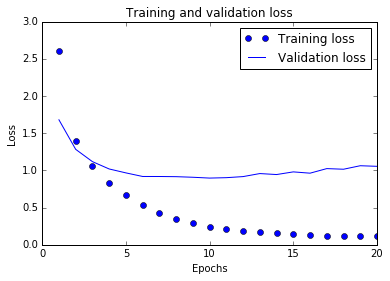

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

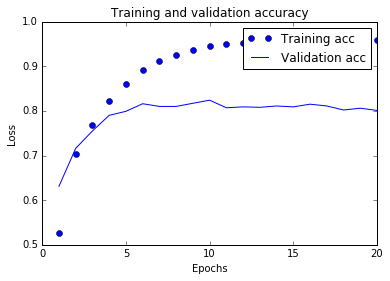

In [23]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We are overfitting! Let's retrain the same model with 9 epochs:

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs=9, 
          batch_size=512, 
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s - loss: 2.5401 - acc: 0.5226 - val_loss: 1.6792 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 1.3785 - acc: 0.7096 - val_loss: 1.2825 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 1.0206 - acc: 0.7781 - val_loss: 1.1322 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.8003 - acc: 0.8257 - val_loss: 1.0525 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.6391 - acc: 0.8628 - val_loss: 0.9754 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.5112 - acc: 0.8929 - val_loss: 0.9104 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.4114 - acc: 0.9143 - val_loss: 0.8918 - val_acc: 0.8230
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.3352 - acc: 0.92